In [562]:
#import bibliotecas
import tensorflow as tf
from tensorflow import keras

import cv2
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance

In [563]:
def thresh(image,blur,tamanho_images):    
    image = cv2.resize(image, dsize=(tamanho_images, tamanho_images), interpolation=cv2.INTER_CUBIC)
    ksize = (blur, blur)
    image = cv2.blur(image, ksize) 

#    print(image[24])    
#    cv2.imshow("Final 1", image)
#    cv2.waitKey(0)

    ret,thresh1 = cv2.threshold(image,240,255,cv2.THRESH_BINARY)
    
    return thresh1

In [564]:
def maior_coluna(image,blur,tamanho_images):
    thresh1 = thresh(image,blur,tamanho_images)
    thresh1 = thresh1.transpose()
#    cv2.imshow("Final 1", thresh1)
#    cv2.waitKey(0)
    valor=0
    for i in range(tamanho_images):
        linha = thresh1[i]
        tamanho = np.sum(linha == 0)
        if tamanho>valor:
            maior_linha=i
            valor=tamanho
    
    return valor

In [620]:
def maior_linha(image,blur,tamanho_images):
    thresh1 = thresh(image,blur,tamanho_images)
    
    valor=0
    for i in range(tamanho_images):
        linha = thresh1[i]
        tamanho = np.sum(linha == 0)
        if tamanho>valor:
            maior_linha=i
            valor=tamanho
    
    return valor

In [921]:
#Carregar base treino
sofas=[]
tamanhos=[]
blur=2
tamanho_images = 48 
num_images=100

for i in range(num_images):
    
    nome = "train/" + str(i+1) + ".jpg"
    imagem = cv2.imread(nome,0)

    image = cv2.resize(imagem, dsize=(tamanho_images, tamanho_images), interpolation=cv2.INTER_CUBIC)
    ksize = (blur, blur)
    image = cv2.blur(image, ksize) 
    
    sofas.append(np.array(image/255,dtype='float64'))
    
    largura = maior_linha(imagem,blur,tamanho_images)
    altura = maior_coluna(imagem,blur,tamanho_images)    
    
    razao = round(largura/altura)
#    print(razao)
        
    if razao==1:
        tamanhos.append(0)
    elif razao==2:
        tamanhos.append(1)
    elif razao==3:
        tamanhos.append(2)
    else:
        tamanhos.append(3)
    

In [922]:
#Carregar base teste
sofas_teste=[]
tamanhos_teste=[]

i=num_images
while i<=1500:
    
    nome = "train/" + str(i+1) + ".jpg"
    imagem = cv2.imread(nome,0)

    image = cv2.resize(imagem, dsize=(tamanho_images, tamanho_images), interpolation=cv2.INTER_CUBIC)
    ksize = (blur, blur)
    image = cv2.blur(image, ksize) 
    
    sofas_teste.append(np.array(image/255,dtype='float64'))

    largura = maior_linha(imagem,blur,tamanho_images)
    altura = maior_coluna(imagem,blur,tamanho_images)    
    
    razao = round(largura/altura)
 #   print(tamanhos_teste)
        
    if razao==1:
        tamanhos_teste.append(0)
    elif razao==2:
        tamanhos_teste.append(1)
    elif razao==3:
        tamanhos_teste.append(2)
    else:
        tamanhos_teste.append(3)
        
    i=i+1

In [923]:
#print(tamanhos_teste)

In [924]:
#print(len(tamanhos_teste))

In [925]:
#classes
class_names = ['Poltroninha','2 lugares','3 lugares','Familia']

In [926]:
train_images = np.array(sofas)
test_images = np.array(sofas_teste)
train_labels = np.array(tamanhos)
test_labels  = np.array(tamanhos_teste)

print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

print(train_labels)

(100, 48, 48)
(1401, 48, 48)
(100,)
(1401,)
[1 3 1 1 1 1 1 1 2 2 2 2 3 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 2 1 2 1 2 1 1
 1 1 1 1 1 2 1 3 1 1 2 2 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 2 2 2 1 3 2 2 1 1 1
 2 0 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1]


In [927]:
train_images.shape

(100, 48, 48)

In [928]:
#quantidade de exemplos em cada classe
unique_labels,counts_examples = np.unique(train_labels,return_counts=True)
counts_examples

array([ 1, 64, 31,  4], dtype=int64)

In [929]:
#as classes
unique_labels

array([0, 1, 2, 3])

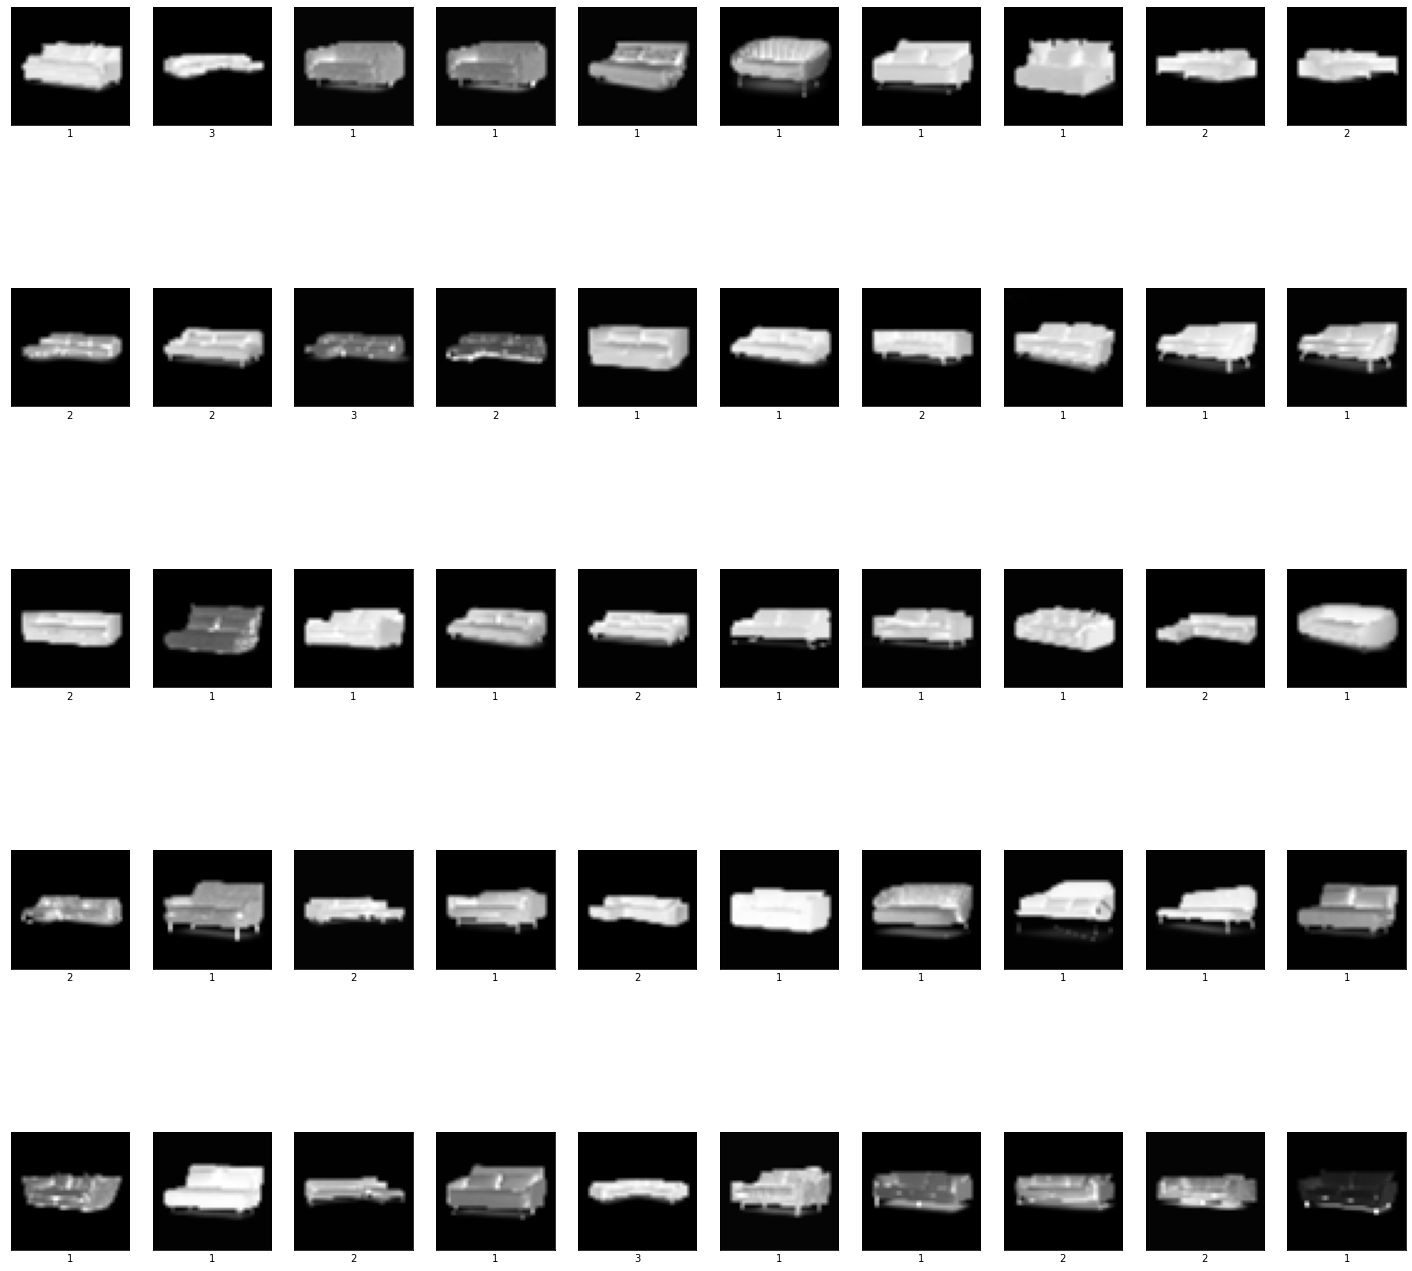

In [930]:
plt.figure(figsize=(25,25))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(tamanhos[i])
plt.show()

In [931]:
#machine Learning
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48,48)),
    keras.layers.Dense(524,activation='relu'),
    keras.layers.Dense(4,activation='softmax')
])

In [932]:
#configuração para o treinamento do classificador
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [933]:
#print(train_images)
train_labels.shape

(100,)

In [934]:
#treinando classificador
model.fit(train_images,train_labels,epochs=30);

Epoch 1/30
4/4 [==============================] - 0s 8ms/step - loss: 5.2313 - accuracy: 0.5700
Epoch 2/30
4/4 [==============================] - 0s 10ms/step - loss: 1.9075 - accuracy: 0.6700
Epoch 3/30
4/4 [==============================] - 0s 10ms/step - loss: 1.4489 - accuracy: 0.6200
Epoch 4/30
4/4 [==============================] - 0s 9ms/step - loss: 1.1637 - accuracy: 0.5300
Epoch 5/30
4/4 [==============================] - 0s 9ms/step - loss: 0.8292 - accuracy: 0.6400
Epoch 6/30
4/4 [==============================] - 0s 7ms/step - loss: 0.7230 - accuracy: 0.8100
Epoch 7/30
4/4 [==============================] - 0s 8ms/step - loss: 0.8286 - accuracy: 0.7900
Epoch 8/30
4/4 [==============================] - 0s 7ms/step - loss: 0.8005 - accuracy: 0.6700
Epoch 9/30
4/4 [==============================] - 0s 7ms/step - loss: 0.6778 - accuracy: 0.8200
Epoch 10/30
4/4 [==============================] - 0s 7ms/step - loss: 0.6032 - accuracy: 0.9100
Epoch 11/30
4/4 [====================

In [935]:
#avaliando modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n Acurácia no conjunto de teste: ',test_acc)

44/44 - 0s - loss: 0.6386 - accuracy: 0.8094 - 236ms/epoch - 5ms/step

 Acurácia no conjunto de teste:  0.8094218373298645


In [936]:
#fazendo predição para o conjunto teste
predictions = model.predict(test_images)

44/44 [==============================] - 0s 3ms/step


In [937]:
predictions[0]

array([0.00090907, 0.37791908, 0.6163724 , 0.00479943], dtype=float32)

In [938]:
#estimando a classe para cada exemplo de teste
np.argmax(predictions[4])

1

In [939]:
test_labels[4]

1

In [940]:
#funcao para plotar a imagem com a classe predita e a classe verdadeira

def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img = predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    fator = predicted_label
#    print(fator)
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[fator],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
    

In [941]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array,true_label = predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(4),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

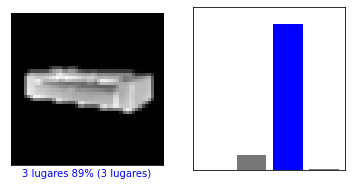

In [942]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()